In [1]:
# ZTEC_LSTM_MODEL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/Users/admin/Desktop/project/gonggong/data/energy_merge_data.csv')

In [4]:
dataset = dataset.fillna(0)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
print(dataset['pw_cool'], dataset['pw_heat'], dataset['pw_light'], dataset['pw_water'], dataset['pw_air'], dataset['pw_etc'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
99421    0.0
99422    0.0
99423    0.0
99424    0.0
99425    0.0
99426    0.0
99427    0.0
99428    0.0
99429    0.0
99430    0.0
99431    0.0
99432    0.0
99433    0.0
99434    0.0
99435    0.0
99436    0.0
99437    0.0
99438    0.0
99439    0.0
99440    0.0
99441    0.0
99442    0.0
99443    0.0
99444    0.0
99445    0.0
99446    0.0
99447    0.0
99448    0.0
99449    0.0
99450    0.0
Name: pw_cool, Length: 99451, dtype: float64 0        30.0
1        25.7
2        25.2
3        25.0
4        23.4
5        22.5
6        22.1
7        23.9
8        23.1
9        22.6
10       22.3
11      

In [7]:
dataset['date'][70076]

'2017-01-01 00:00'

In [8]:
Train_dataset = dataset.loc[:70076]
Test_dataset = dataset.loc[70076:]

In [9]:
# define train_dataset
train_dataset = pd.concat([Train_dataset['temp'], Train_dataset['rain'], Train_dataset['wind_deg'], Train_dataset['wind_speed(m/s)'], Train_dataset['sealevel_pressure(hPa)'], Train_dataset['hum(%)']], axis = 1)
train_dataset = np.array(train_dataset)
train_dataset = np.reshape(train_dataset, (train_dataset.shape[0], train_dataset.shape[1], 1))
train_light = Train_dataset['pw_etc']
train_light = np.array(train_light)
train_light = np.reshape(train_light, (train_light.shape[0], 1))
print(np.shape(train_dataset))
print(np.shape(train_light))

(70077, 6, 1)
(70077, 1)


In [10]:
# define test_dataset
test_dataset = pd.concat([Test_dataset['temp'], Test_dataset['rain'], Test_dataset['wind_deg'], Test_dataset['wind_speed(m/s)'], Test_dataset['sealevel_pressure(hPa)'], Test_dataset['hum(%)']], axis = 1)
test_dataset = np.array(test_dataset)
test_dataset = np.reshape(test_dataset, (test_dataset.shape[0], test_dataset.shape[1], 1))
test_light = Test_dataset['pw_etc']
test_light = np.array(test_light)
test_light = np.reshape(test_light, (test_light.shape[0], 1))
print(np.shape(test_dataset))
print(np.shape(test_light))

(29375, 6, 1)
(29375, 1)


In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_dataset.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(train_dataset, train_light, epochs = 1, batch_size = 32)

Epoch 1/1
70077/70077 [==============================] - 85s 1ms/step - loss: 1.3242


In [16]:
predict = regressor.predict(test_dataset)

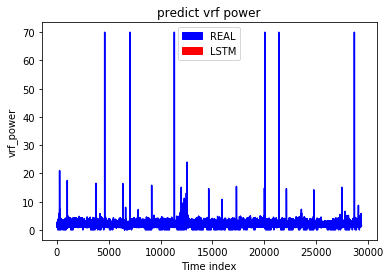

In [17]:
import matplotlib.patches as mpatches

plt.plot(predict, color = 'red', label = 'Predict')
plt.plot(test_light, color = 'blue', label = 'Real')
plt.title('predict vrf power')
plt.xlabel('Time index')
plt.ylabel('vrf_power')

red_patch = mpatches.Patch(color='red', label='LSTM')
blue_patch = mpatches.Patch(color='blue', label='REAL')
plt.legend(handles=[blue_patch, red_patch])



plt.show()

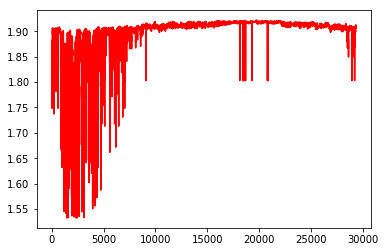

In [18]:
plt.plot(predict, color = 'red', label = 'Predict')

In [19]:
Predict = pd.DataFrame(predict)
print(Predict)

              0
0      1.879443
1      1.880690
2      1.854504
3      1.854504
4      1.881184
5      1.869698
6      1.880609
7      1.879513
8      1.878482
9      1.877242
10     1.878312
11     1.877344
12     1.876161
13     1.873697
14     1.830379
15     1.826690
16     1.826690
17     1.865332
18     1.865210
19     1.848748
20     1.863591
21     1.796545
22     1.855114
23     1.855103
24     1.853297
25     1.776172
26     1.776628
27     1.776174
28     1.849101
29     1.759702
...         ...
29345  1.910843
29346  1.911431
29347  1.910307
29348  1.910196
29349  1.911062
29350  1.909863
29351  1.910658
29352  1.910398
29353  1.910351
29354  1.909108
29355  1.909009
29356  1.910069
29357  1.909928
29358  1.909828
29359  1.908236
29360  1.907949
29361  1.909343
29362  1.907758
29363  1.909156
29364  1.909024
29365  1.908950
29366  1.908903
29367  1.908748
29368  1.908675
29369  1.906775
29370  1.906599
29371  1.908196
29372  1.906367
29373  1.906430
29374  1.908186

[29375 

In [20]:
len(Test_dataset['date'][:-1])

29374

In [21]:
a = Test_dataset['date'][:-1]
a = a.reset_index(drop=True)
a = pd.DataFrame(a)
print(a)

                   date
0      2017-01-01 00:00
1      2017-01-01 00:15
2      2017-01-01 00:30
3      2017-01-01 00:45
4      2017-01-01 01:00
5      2017-01-01 01:15
6      2017-01-01 01:30
7      2017-01-01 01:45
8      2017-01-01 02:00
9      2017-01-01 02:15
10     2017-01-01 02:30
11     2017-01-01 02:45
12     2017-01-01 03:00
13     2017-01-01 03:15
14     2017-01-01 03:30
15     2017-01-01 03:45
16     2017-01-01 04:00
17     2017-01-01 04:15
18     2017-01-01 04:30
19     2017-01-01 04:45
20     2017-01-01 05:00
21     2017-01-01 05:15
22     2017-01-01 05:30
23     2017-01-01 05:45
24     2017-01-01 06:00
25     2017-01-01 06:15
26     2017-01-01 06:30
27     2017-01-01 06:45
28     2017-01-01 07:00
29     2017-01-01 07:15
...                 ...
29344  2017-11-07 16:15
29345  2017-11-07 16:30
29346  2017-11-07 16:45
29347  2017-11-07 17:00
29348  2017-11-07 17:15
29349  2017-11-07 17:30
29350  2017-11-07 17:45
29351  2017-11-07 18:00
29352  2017-11-07 18:15
29353  2017-11-0

In [22]:
result = pd.concat([a, Predict], axis=1)

In [23]:
result

,date,0
0,2017-01-01 00:00,1.879443
1,2017-01-01 00:15,1.880690
2,2017-01-01 00:30,1.854504
3,2017-01-01 00:45,1.854504
4,2017-01-01 01:00,1.881184
5,2017-01-01 01:15,1.869698
6,2017-01-01 01:30,1.880609
7,2017-01-01 01:45,1.879513
8,2017-01-01 02:00,1.878482
9,2017-01-01 02:15,1.877242


In [24]:
result.to_csv('./pw_etc_result.csv')